## Data Analysis

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
path = './Churn_Modelling.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Data-Analysis:


### Trend of Exits per Region

In [14]:
exits_per_geo = defaultdict(int)

for d in data[data.Exited == 1].Geography.values:  # Customers who exited
    exits_per_geo[d] += 1

In [15]:
exits_per_geo

defaultdict(int, {'France': 810, 'Spain': 413, 'Germany': 814})

In [16]:
x = [i for i in exits_per_geo.keys()]
y = [exits_per_geo[i] for i in x]

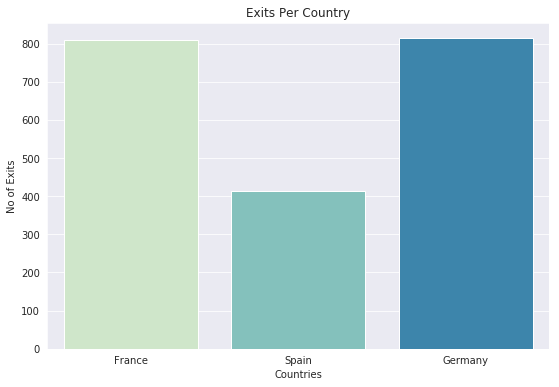

In [19]:
sea.set_style('darkgrid')
plt.figure(figsize=(9 , 6))
plt.gca().set(xlabel = 'Countries', ylabel = 'No of Exits', Title = 'Exits Per Country')
# plt.ylim(300, 830)
sea.barplot(x, y, palette= 'GnBu')

### Trend of Exits per Gender :
This analysis can be very helpful in deciding whether users of a particular gender are leaving the bank's service more often than the other. 

In [21]:
exits_per_gender = defaultdict(int)

for d in data[data.Exited == 1].Gender.values: # Customers who exited
    exits_per_gender[d] += 1

[Text(0, 0.5, 'No of Exits'),
 Text(0.5, 0, 'Gender'),
 Text(0.5, 1.0, 'Exits Per Gender')]

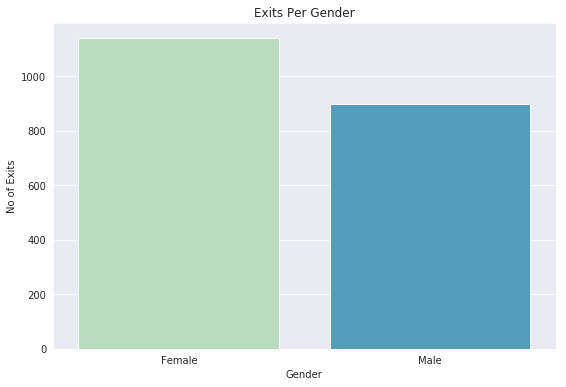

In [23]:
x = [i for i in exits_per_gender.keys()]
y = [exits_per_gender[i] for i in x]

plt.figure(figsize= (9, 6))
sea.barplot(x,y, palette='GnBu')
plt.gca().set(xlabel = 'Gender', ylabel = 'No of Exits', Title = 'Exits Per Gender')

In [24]:
exits_per_gender

defaultdict(int, {'Female': 1139, 'Male': 898})

In [25]:
wedge = [(i, exits_per_gender[i]/sum(exits_per_gender.values())) for i in exits_per_gender.keys()]

In [26]:
wedge

[('Female', 0.5591556210112911), ('Male', 0.4408443789887089)]

([<matplotlib.patches.Wedge at 0x7fad9755a160>,
 [Text(-1.6215883971557852, -0.3048787795333292, 'Female'),
  Text(1.6707274100840261, 0.3141176868530698, 'Male')],
 [Text(-0.8845027620849736, -0.1662975161090886, '55.92'),
  Text(0.933641787988132, 0.1755363544178919, '44.08')])

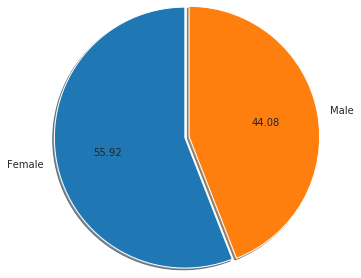

In [42]:
plt.pie(x=[wedge[0][1], wedge[1][1]],labels=[wedge[0][0], wedge[1][0]], autopct='%0.02f', explode=(0,0.05), radius= 1.5, shadow=True, startangle=90)

### No. of Exits by Active/Non-Active Users

In [50]:
exits_per_activeness = defaultdict(int)

for d in data.values:
    if d[-1] == 1 : # Customers who exited   
        exits_per_activeness[d[-3]] += 1

In [52]:
x = list(exits_per_activeness.keys())
y = list(exits_per_activeness.values())

([<matplotlib.axis.XTick at 0x7fe6ba7d6080>,
 <a list of 2 Text xticklabel objects>)

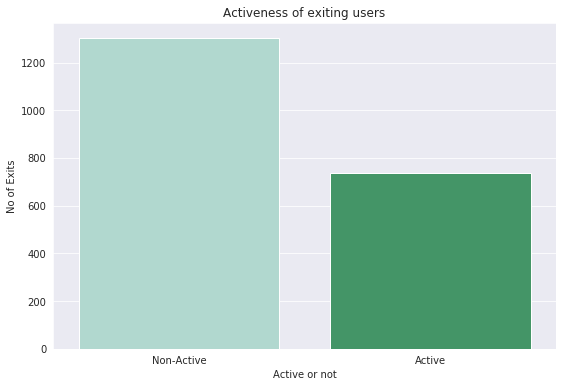

In [55]:
plt.figure(figsize= (9, 6))
sea.barplot(x, y, palette='BuGn')
plt.gca().set(xlabel = 'Active or not', ylabel = 'No of Exits', Title = 'Activeness of exiting users')
plt.xticks(ticks = [1, 0], labels=['Active', 'Non-Active'])


### Trend of Exits per Credit score 

In [88]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [90]:
exits_per_creditscore = []

In [91]:
for d in data.values:
    if d[-1] == 1:
        exits_per_creditscore.append(d[3])

In [93]:
exits_per_creditscore.sort()

[Text(0, 0.5, 'Probability of Exits'),
 Text(0.5, 0, 'Credit Scores'),
 Text(0.5, 1.0, 'Probability of exits across different Credit Scores ')]

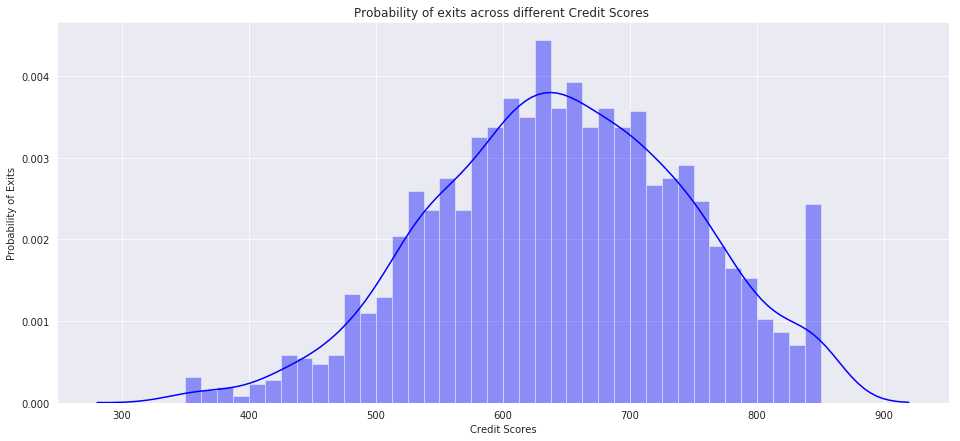

In [111]:
sea.distplot(exits_per_creditscore, bins = 40, color = 'b')
plt.gca().set(xlabel = 'Credit Scores', ylabel = 'Probability of Exits', Title = 'Probability of exits across different Credit Scores ')

### Trend of Exits per Age-group

In [59]:
exits_per_age = defaultdict(int)
for d in data.values:
    if d[-1] == 1: # Customers who exited
        exits_per_age[d[6]] += 1

In [60]:
x = list(exits_per_age.keys())
y = list(exits_per_age.values())

[Text(0, 0.5, 'No. of Exits'),
 Text(0.5, 0, 'Age'),
 Text(0.5, 1.0, 'No. of exits across different Ages ')]

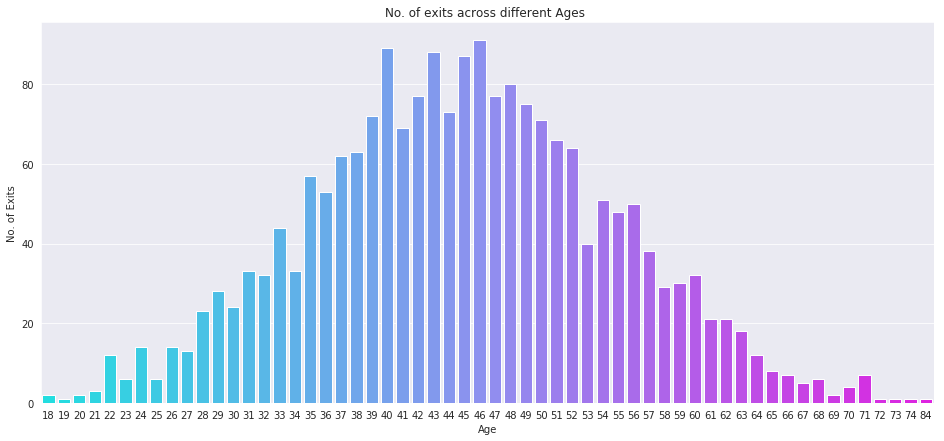

In [86]:
sea.barplot(x,y, palette='cool')
plt.gca().set(xlabel = 'Age', ylabel = 'No. of Exits', Title = 'No. of exits across different Ages ')

In [80]:
AgeExits = []
for d in data.values:
    if d[-1] == 1:
        AgeExits.append(d[6]) 

In [81]:
AgeExits.sort()
AgeExits[-10:]

[71, 71, 71, 71, 71, 71, 72, 73, 74, 84]

In [82]:
Age_bins = list(set(AgeExits))

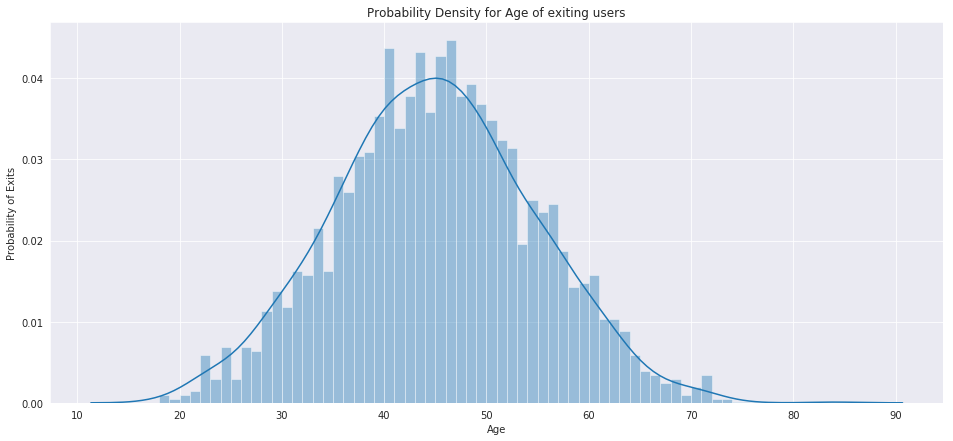

In [87]:
plt.gca().set(xlabel = 'Age', ylabel = 'Probability of Exits', Title = 'Probability Density for Age of exiting users')
sea.distplot(AgeExits, bins = Age_bins)